# HOMEWORK 14

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

C:\Users\Department\AppData\Local\Temp\ipykernel_10140\2118810653.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


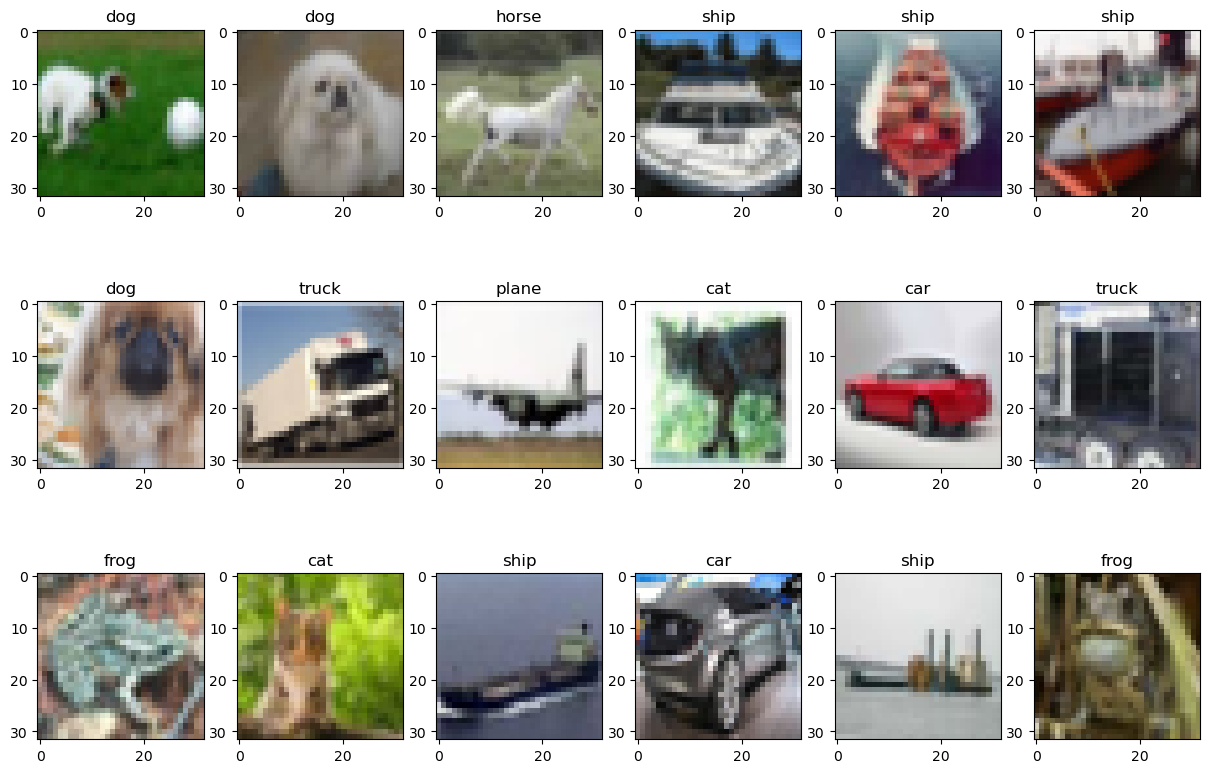

In [4]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0,len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(<BarContainer object of 10 artists>,
 None,
 Text(0.5, 0, 'Classes'),
 Text(0, 0.5, 'Number of samples'))

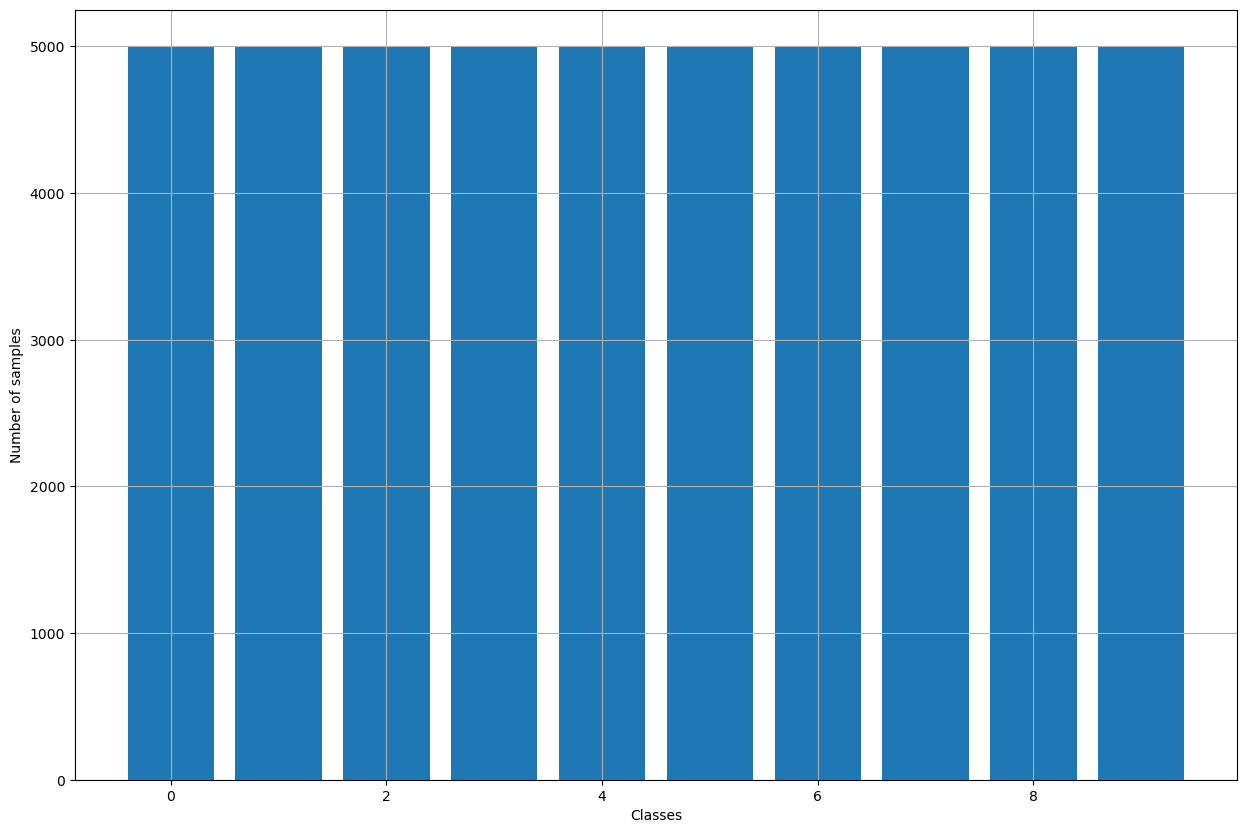

In [6]:
# Compute the class histogram
from collections import Counter
y_train = y_train.flatten()

hist = Counter(y_train)

plt.bar(hist.keys(), hist.values()), plt.grid(True), plt.xlabel('Classes'), plt.ylabel('Number of samples')

In [7]:
#  The dataset is balanced

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [9]:
size = x_train.shape[1]

# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [11]:
inputs = Input(shape=(size, size, 3))

net = Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          23,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Training

Compile the model and train it.

In [13]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3289 - loss: 1.8655 - val_accuracy: 0.4936 - val_loss: 1.4793
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5176 - loss: 1.3728 - val_accuracy: 0.5524 - val_loss: 1.2995
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.5741 - loss: 1.2242 - val_accuracy: 0.6084 - val_loss: 1.1467
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6053 - loss: 1.1303 - val_accuracy: 0.6314 - val_loss: 1.0758
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6307 - loss: 1.0647 - val_accuracy: 0.6482 - val_loss: 1.0348
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6483 - loss: 1.0156 - val_accuracy: 0.6518 - val_loss: 1.0092
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.6652 - loss: 0.9772 - val_accuracy: 0.6558 - val_loss: 0.9934
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.6786 - loss: 0.9452 - val_acc

Train Acc      0.7797333598136902
Validation Acc 0.6972000002861023


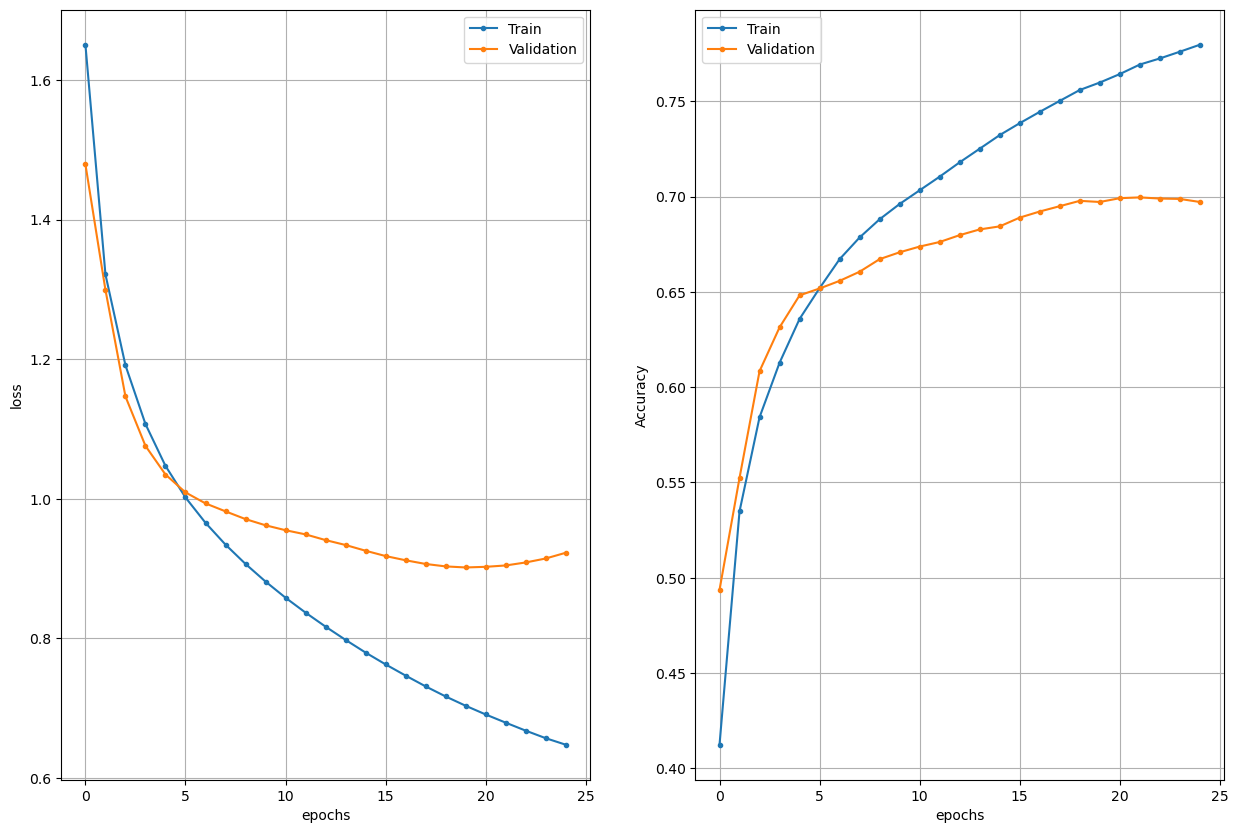

In [14]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [16]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
True [3 8 8 0 6]
Pred [3 8 8 0 6]
Pred [[2.12662853e-04 7.29722933e-06 6.98232325e-04 9.80963588e-01
  6.71312737e-04 6.87131565e-03 1.76595571e-03 1.95799057e-05
  8.77599139e-03 1.42116160e-05]
 [8.91753007e-03 1.60473526e-01 2.55578343e-05 2.94367659e-08
  4.69323908e-07 9.92345206e-10 8.52549031e-10 6.42373479e-08
  8.28364611e-01 2.21820269e-03]
 [3.58952224e-01 5.80232516e-02 5.51483594e-03 1.66255478e-02
  2.93388148e-03 2.24409928e-03 9.43967170e-05 1.01872711e-02
  5.31436503e-01 1.39879324e-02]
 [9.67238367e-01 4.72269283e-04 1.29008759e-02 1.21945713e-03
  7.83946947e-04 1.41739365e-05 5.40544670e-06 3.30165582e-04
  1.67134628e-02 3.21756990e-04]
 [2.22780386e-07 3.46796969e-06 5.14021143e-03 1.92908142e-02
  4.67803568e-01 3.43261915e-03 5.04307926e-01 2.32702382e-06
  1.66654590e-05 2.17428919e-06]]
(10000, 10)


In [17]:
# Compute and print the accuracy for each class
digits = range(0, 10)
y_pred = np.argmax(y_pred, axis=1)

for class_id, class_name in classes.items():
    mask = y_true == class_id
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    acc = tp/total
    print(class_name, acc)

plane 0.739
car 0.722
bird 0.627
cat 0.437
deer 0.675
dog 0.666
frog 0.743
horse 0.717
ship 0.742
truck 0.785


In [18]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6903 - loss: 0.9346
Test loss   0.9466732144355774
Test metric 0.6852999925613403


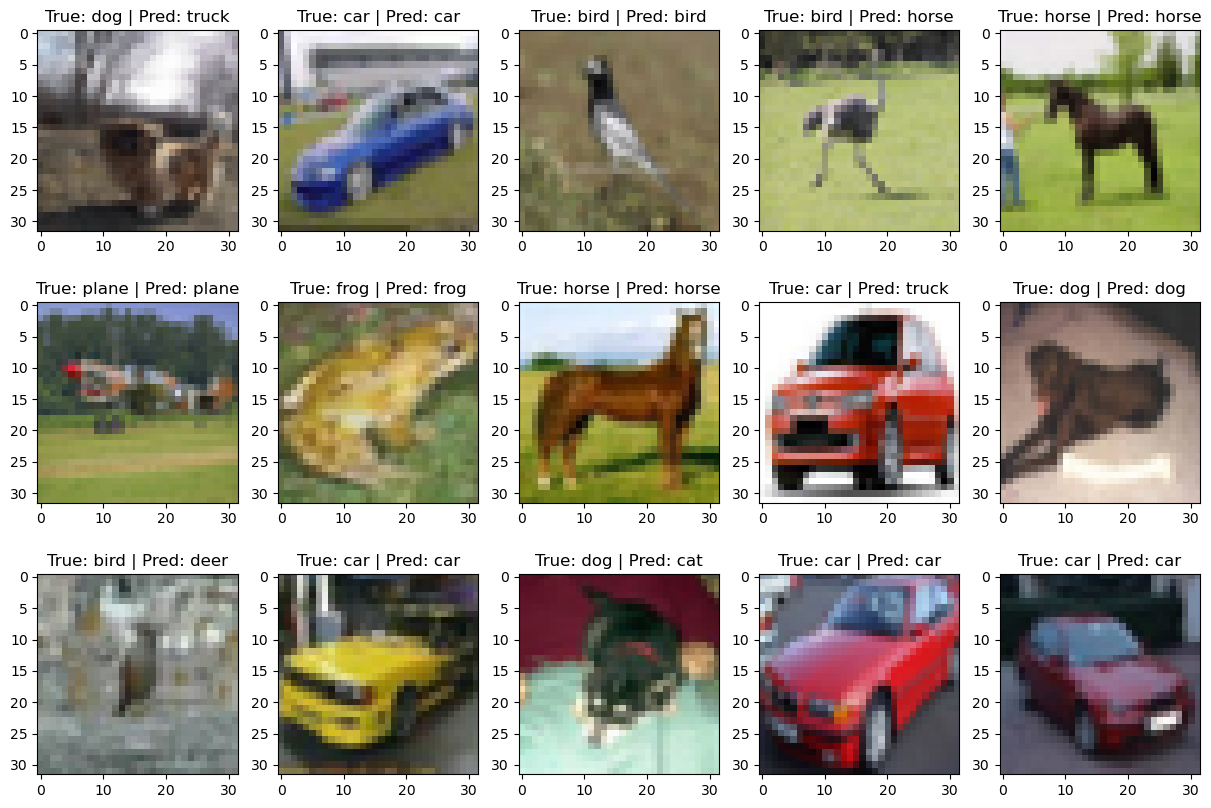

In [19]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0,len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

In [21]:
#  Accuracy of the classifier is 67.18%
#  With increasing the number of filters in the convolutional layers, the accuracy increased to 68.5%
